# loading the image

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("image.png")
image.shape

(451, 563, 3)

so we have a color image here. No worries we can transform it into grayscale image

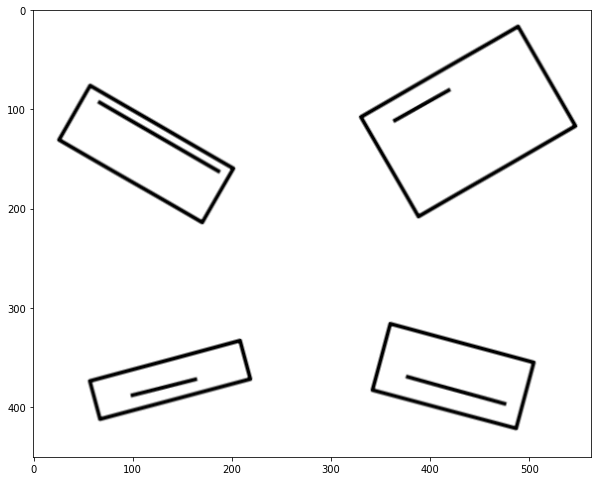

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(image[::-1])

plt.show();

# Task outline:
- transform the image into grayscale
- align all the rectangle form the image
- label the rectangle with a ordinal value based on the line inside the rectangle object

# Transforming the Image into grayscale

In [4]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image.shape

(451, 563)

- so we have 451 * 563 gray scale image now

In [7]:
gray_image[100:120,:20]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

# Align all the rectangle from the image

### First approach: capturing the coordinate of each image manually

In [18]:
rect_1_bl = (77,56) #rectangle first bottom left coordinate 

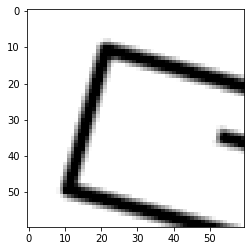

In [23]:
plt.imshow(gray_image[rect_1_bl[0]-50 : rect_1_bl[0]+10 , rect_1_bl[1]-10 : rect_1_bl[1]+50],cmap='gray')
plt.show()

In [120]:
gray_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Using harrcornering

In [25]:
import numpy as np

In [45]:

gray = np.float32(gray_image)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#here u can get corners
np.int32(corners) , len(corners)

(array([[281, 225],
        [487,  27],
        [ 66,  36],
        [477,  52],
        [ 97,  61],
        [340,  66],
        [ 55,  77],
        [165,  78],
        [220,  77],
        [375,  81],
        [505,  95],
        [209, 118],
        [359, 134],
        [170, 234],
        [387, 240],
        [188, 287],
        [203, 291],
        [ 24, 319],
        [548, 332],
        [362, 337],
        [328, 343],
        [ 64, 358],
        [ 56, 375],
        [421, 370],
        [489, 435]], dtype=int32),
 25)

- We have extracted all the coorner coordinates of the rectangle of an image

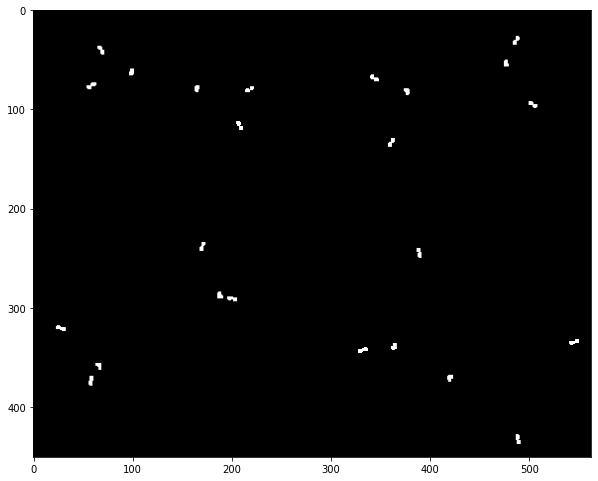

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(dst,cmap='gray')

In [49]:
edged_img = cv2.Canny(gray_image, 30, 200)
contour, hier = cv2.findContours(edged_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [50]:
len(contour)

4

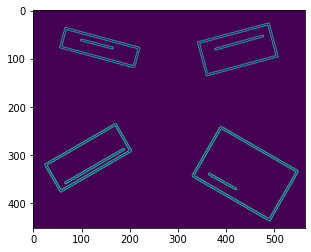

In [55]:
plt.imshow(edged_img)

# working on a single rectangle first

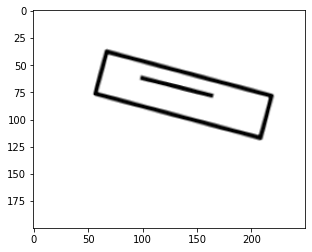

In [209]:
rect_1 = gray_image[: 200 ,:250]
plt.imshow(rect_1, cmap='gray')

In [132]:
#rotation about anti clockwise

In [133]:
import math

In [336]:
def rotate_image(image, angle):
    #changing black color i.e 0 to 5 so that later on we can change the black side due to rotation
#     image = np.where(image == 0,5,image)
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1],
                            flags=cv2.INTER_LINEAR,
                            borderMode = cv2.BORDER_CONSTANT,
                            borderValue=255)
    
    #chaning black color 
#     result = np.where(result == 0, 255, result) 
    return result

In [337]:
b = 209 - 50
p = 118 - 75
theta = math.degrees(atan(p/b))
theta

15.133083148487007

In [338]:
aligned_rect_1 =rotate_image(rect_1,theta)

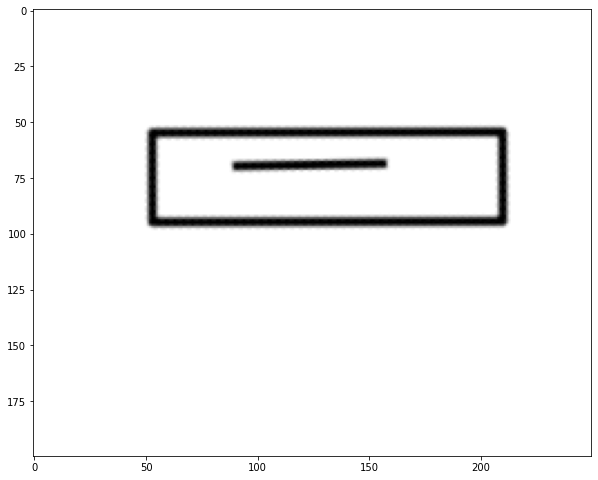

In [339]:
plt.figure(figsize=(10,10))
plt.imshow(aligned_rect_1,cmap='gray')

# Working on second rectangle

In [150]:
aligned_rect_1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

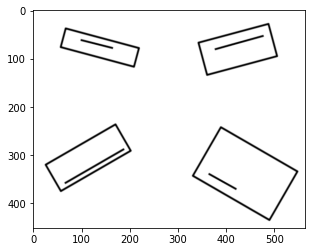

In [215]:
plt.imshow(gray_image,cmap='gray')

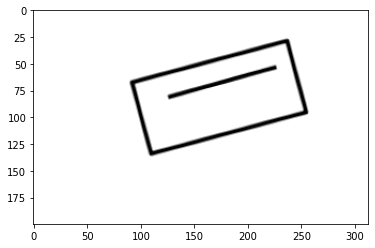

In [216]:
rect_2 = gray_image[:200 ,250:]
plt.imshow(rect_2, cmap='gray')

In [334]:
b = 505 - 359
p = 95 - 134
theta = math.degrees(atan(p/b))
theta

-14.955839930074022

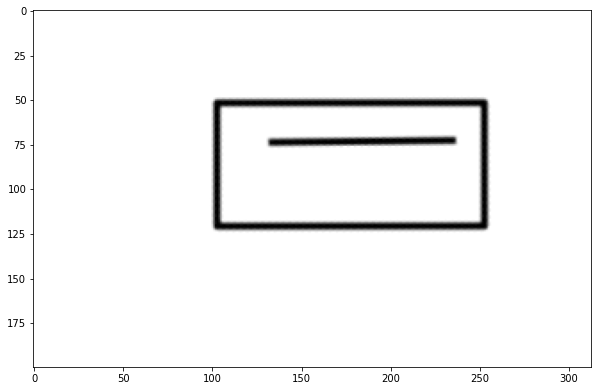

In [335]:
aligned_rect_2 =rotate_image(rect_2,theta)
plt.figure(figsize=(10,10))
plt.imshow(aligned_rect_2,cmap='gray')

# Merging all the reactangle into a single image

In [274]:
final_image = np.ones(gray_image.shape)
final_image.shape

(451, 563)

In [275]:
final_image = final_image * 255
final_image

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

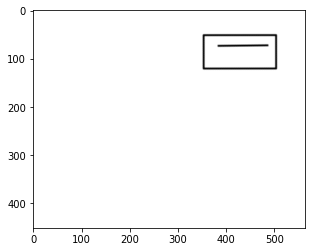

In [277]:
final_image[:200,250:] = aligned_rect_2
plt.imshow(final_image,cmap='gray')

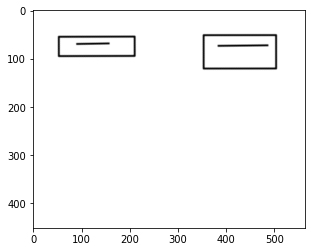

In [278]:
final_image[: 200 ,:250] = aligned_rect_1
plt.imshow(final_image, cmap='gray')

# Clean Code
Instead of Repeating same process again and again lets make a code more readable by using functions

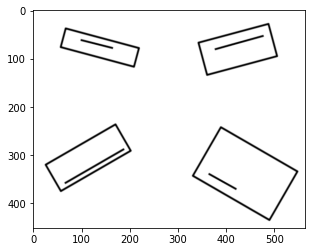

In [285]:
#printing image
plt.imshow(gray_image, cmap='gray')
plt.show()

In [925]:
#cropping the image into four different image each of them contains each rectangle of the given figure
rectangle_first_size = (200,250)
rectangle_first_image = gray_image[:rectangle_first_size[0],:rectangle_first_size[1]]
rectangle_second_image = gray_image[:rectangle_first_size[0],rectangle_first_size[1]:]
rectangle_third_image = gray_image[rectangle_first_size[0]:,:rectangle_first_size[1]]
rectangle_fourth_image = gray_image[rectangle_first_size[0]:,rectangle_first_size[1]:]

rect_images = [rectangle_first_image, rectangle_second_image, rectangle_third_image, rectangle_fourth_image]

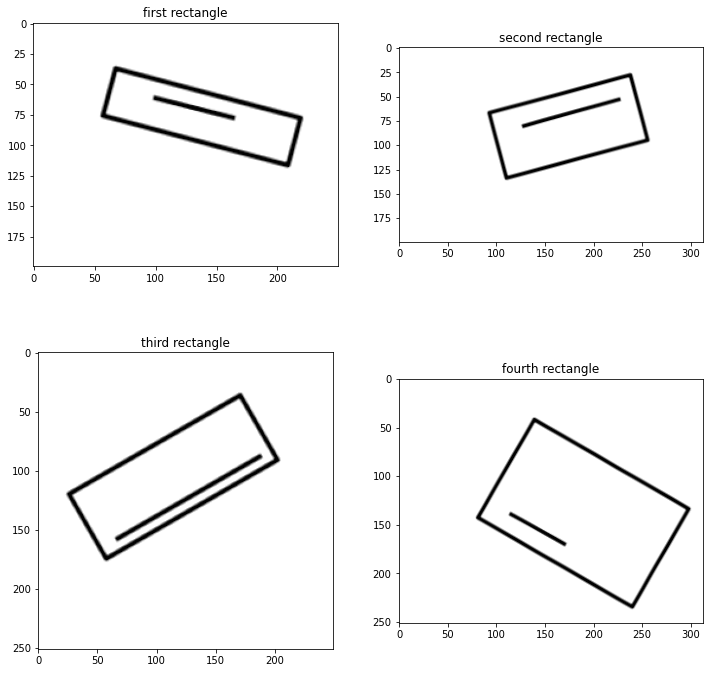

In [926]:
plt.figure(figsize=(12,12))
#first rectangle
plt.subplot(2,2,1)
plt.imshow(rectangle_first_image, cmap='gray')
plt.title("first rectangle")
#second rectangle
plt.subplot(2,2,2)
plt.imshow(rectangle_second_image, cmap='gray')
plt.title("second rectangle")
#third rectangle
plt.subplot(2,2,3)
plt.imshow(rectangle_third_image, cmap='gray')
plt.title("third rectangle")
#fourth rectangel
plt.subplot(2,2,4)
plt.imshow(rectangle_fourth_image, cmap='gray')
plt.title("fourth rectangle")
plt.show()

In [927]:
# function to rotate an image
def rotate_image(image, angle):  #rotate the image about the given angle around the center of the image
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1],
                            flags=cv2.INTER_LINEAR,
                            borderMode = cv2.BORDER_CONSTANT,
                            borderValue=255)
 
    return result

In [928]:
def get_angle(point1, point2): #return the angle between 
    base = point2[0] - point1[0]
    perpendicular = point2[1] - point1[1]
    theta = math.degrees(atan(perpendicular/base))
    print(point1,point2, theta)
    return theta

In [929]:
b = 209 - 50
p = 118 - 75
theta = math.degrees(atan(p/b))
print(theta)

b = 505 - 359
p = 95 - 134
theta = math.degrees(atan(p/b))
print(theta)

15.133083148487007
-14.955839930074022


In [930]:
# two points of the base of each rectangle
base_lines = [[(50,75),(209,118)],[(359, 134,), (505,95)],[(203, 291),(56, 375)],[(328, 343), (489, 435)]]

In [931]:
#align each rectangle

aligned_rects = []
for rect_img, base_coord in zip(rect_images,base_lines):
    theta = get_angle(*base_coord)
    print(theta)
    aligned_rects.append(rotate_image(rect_img,theta))  
print(len(aligned_rects))

(50, 75) (209, 118) 15.133083148487007
15.133083148487007
(359, 134) (505, 95) -14.955839930074022
-14.955839930074022
(203, 291) (56, 375) -29.74488129694222
-29.74488129694222
(328, 343) (489, 435) 29.74488129694222
29.74488129694222
4


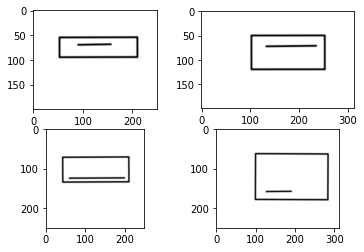

In [932]:
for index, rect in enumerate(aligned_rect):
    plt.subplot(2,2,index+1)
    plt.imshow(rect, cmap='gray')
plt.show()

In [933]:
# merging all the rectangel into a single image of original shape
final_image = np.ones(gray_image.shape) * 255
final_image[:rectangle_first_size[0],:rectangle_first_size[1]] = aligned_rects[0]
final_image[:rectangle_first_size[0],rectangle_first_size[1]:] = aligned_rects[1]
final_image[rectangle_first_size[0]:,:rectangle_first_size[1]] = aligned_rects[2]
final_image[rectangle_first_size[0]:,rectangle_first_size[1]:] = aligned_rects[3]

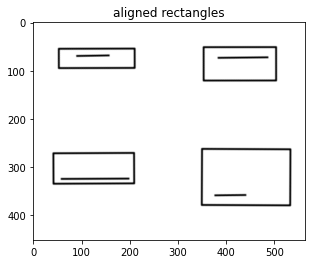

In [934]:
plt.imshow(final_image, cmap='gray')
plt.title("aligned rectangles")
plt.show();

# Task two
- now we have to find the length of the line that is inside each rectangle and add it as a figure caption

Steps:
- we break down the image into none-overlapping subimage each of them contains exactly one rectangle
- 

In [935]:
#cropping the image into four different image each of them contains each rectangle of the given figure
rectangle_first_size = (200,250)
rectangle_first_image = final_image[:rectangle_first_size[0],:rectangle_first_size[1]]
rectangle_second_image = final_image[:rectangle_first_size[0],rectangle_first_size[1]:]
rectangle_third_image = final_image[rectangle_first_size[0]:,:rectangle_first_size[1]]
rectangle_fourth_image = final_image[rectangle_first_size[0]:,rectangle_first_size[1]:]

rect_images = [rectangle_first_image, rectangle_second_image, rectangle_third_image, rectangle_fourth_image]

In [936]:
rectangle_second_image = rectangle_second_image.astype(np.uint8)
kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
im = cv2.filter2D(rectangle_second_image, -1, kernel)
ret, thresh = cv2.threshold(im, 127, 255, 0)

In [937]:
contours, hierarchy = cv2.findContours(thresh, 1,cv2.RETR_TREE)

In [938]:
len(contours)

4

In [939]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [-1,  2, -1, -1]]], dtype=int32)

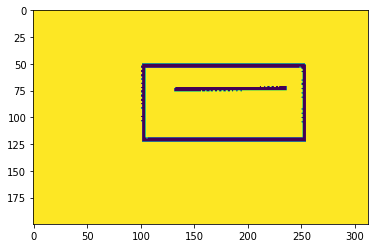

In [940]:
plt.imshow(thresh)

In [941]:
cnt = contours[0]

In [942]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)

In [943]:
box

array([[130.94968 ,  71.025955],
       [236.98334 ,  69.68375 ],
       [237.0564  ,  75.45497 ],
       [131.02274 ,  76.79718 ]], dtype=float32)

In [944]:
def calculate_dist(box):
        #p1 (min(x,y)) and p2(min(x,y))
        #distance abs(p2 - p1)
        p1 = box[0]
        p2 = box[0]
        for point in box:
            if point[0] > p2[0]:
                p2 = point
            if point[0] < p1[0]:
                p1 = point
#         print(p1,p2)
        return ((p2[0]-p1[0])**2 + (p2[1] - p1[0])**2)**1/2
        

In [945]:
calculate_dist(box)

7169.149164098897

# Writing clean code

In [946]:
def find_line_distance(image):
    image = image.astype(np.uint8)
    kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
    image = cv2.filter2D(image, -1, kernel)
    _, thresh = cv2.threshold(image, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, 1,cv2.RETR_TREE)
    #contours 0 contain child contours : an assumption
    cnt = contours[0]
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    return calculate_dist(box)

In [947]:
dist = []
for rect in rect_images:
    dist.append(find_line_distance(rect))
dist_rank = dist_order_encoder(dist)
print(dist_order_encoder(dist))   
print(dist_rank[0])

[4, 2, 1, 3]
4


In [948]:
def dist_order_encoder(dist_list):
    sorted_list = sorted(dist_list, reverse=True)
    rank = [1+sorted_list.index(x) for x in dist_list ]
    return rank

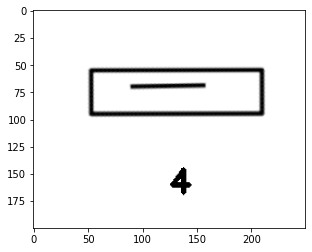

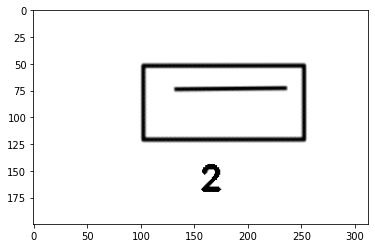

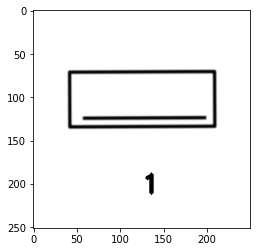

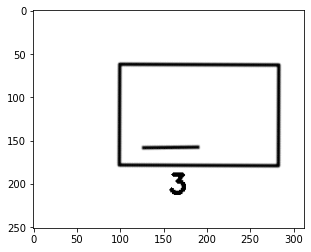

In [949]:
for index,image in enumerate(rect_images):
    cv2.putText(image,str(dist_rank[index]),(image.shape[1]//2,image.shape[0]-image.shape[0]//6 ), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
    plt.imshow(image, cmap='gray')
    plt.show()

# merging all the image

In [950]:
# merging all the rectangel into a single image of original shape
final_image = np.ones(gray_image.shape) * 255
final_image[:rectangle_first_size[0],:rectangle_first_size[1]] = rect_images[0]
final_image[:rectangle_first_size[0],rectangle_first_size[1]:] = rect_images[1]
final_image[rectangle_first_size[0]:,:rectangle_first_size[1]] = rect_images[2]
final_image[rectangle_first_size[0]:,rectangle_first_size[1]:] = rect_images[3]

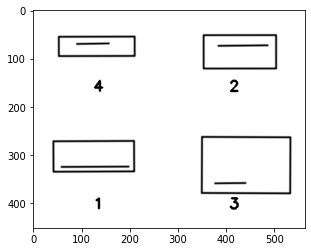

In [951]:
plt.imshow(final_image,cmap='gray')